In [5]:
# Upload the Clean Data here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
data=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\IP_Filing\IP Data Clean new.xlsx")
data.head()

,Unnamed: 0,Year,Date_of_Filing,Date_of_Expiration,IP_Case_ID,IP_Type,IP_Application_Status,Processing_Time_Days,Approval_Rate_percentage,Rejection_Reasons,Number_of_Opposition_Cases_Received,Number_of_Infringement_Cases,IP_Filing_State,Pre_IP_Action_Revenue(INR),Post_IP_Action_Revenue(INR),Enforcement_Cost(INR)
0,0,2024,2024-03-19,2026-05-15,IP-4500,Trade secret,Pending,499.0,92.25,NaN,2,1,Tamil nadu,223840.19,422333.10,62209.78
1,1,2023,2023-06-15,2026-09-24,IP-4772,Copyright,Rejected,363.0,43.91,NaN,2,1,Punjab,338300.05,378851.26,51887.05
2,2,2024,2024-07-08,2031-11-16,IP-6055,Industrial design,Registered,514.0,82.68,NaN,2,1,Karnataka,141143.15,177737.48,38161.51
3,3,2023,2023-06-18,2031-10-18,IP-4243,Trade secret,Pending,249.0,86.82,Incomplete Docs,2,1,Madhya pradesh,192693.25,265472.82,44187.54
4,4,2024,2024-02-22,2026-07-23,IP-8851,Industrial design,Pending,312.0,74.14,NaN,2,1,Assam,166170.68,340283.49,96641.57


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           1000 non-null   int64         
 1   Year                                 1000 non-null   int64         
 2   Date_of_Filing                       1000 non-null   datetime64[ns]
 3   Date_of_Expiration                   1000 non-null   datetime64[ns]
 4   IP_Case_ID                           1000 non-null   object        
 5   IP_Type                              1000 non-null   object        
 6   IP_Application_Status                1000 non-null   object        
 7   Processing_Time_Days                 1000 non-null   float64       
 8   Approval_Rate_percentage             1000 non-null   float64       
 9   Rejection_Reasons                    425 non-null    object        
 10  Number_of_Opp

In [20]:
deleted_column=data.pop("Unnamed: 0")

In [22]:
data

,Year,Date_of_Filing,Date_of_Expiration,IP_Case_ID,IP_Type,IP_Application_Status,Processing_Time_Days,Approval_Rate_percentage,Rejection_Reasons,Number_of_Opposition_Cases_Received,Number_of_Infringement_Cases,IP_Filing_State,Pre_IP_Action_Revenue(INR),Post_IP_Action_Revenue(INR),Enforcement_Cost(INR),IP_Type.1
0,2024,2024-03-19,2026-05-15,IP-4500,Trade secret,Pending,499.0,92.25,NaN,2,1,Tamil nadu,223840.19,422333.1000,62209.780,Trade secret
1,2023,2023-06-15,2026-09-24,IP-4772,Copyright,Rejected,363.0,43.91,NaN,2,1,Punjab,338300.05,378851.2600,51887.050,Copyright
2,2024,2024-07-08,2031-11-16,IP-6055,Industrial design,Registered,514.0,82.68,NaN,2,1,Karnataka,141143.15,177737.4800,38161.510,Industrial design
3,2023,2023-06-18,2031-10-18,IP-4243,Trade secret,Pending,249.0,86.82,Incomplete Docs,2,1,Madhya pradesh,192693.25,265472.8200,44187.540,Trade secret
4,2024,2024-02-22,2026-07-23,IP-8851,Industrial design,Pending,312.0,74.14,NaN,2,1,Assam,166170.68,340283.4900,96641.570,Industrial design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,2023-06-14,2025-04-03,IP-4292,Patent,Pending,45.0,92.96,NaN,4,1,Maharashtra,461902.93,621306.0920,68698.330,Patent
996,2024,2024-11-16,2027-10-07,IP-4565,Patent,Rejected,583.0,92.64,Similarity,3,1,Bihar,470025.98,515881.9711,48839.700,Patent
997,2023,2023-05-06,2028-04-30,IP-5447,Patent,Rejected,368.5,86.28,NaN,4,3,Madhya pradesh,260790.62,347879.5672,51887.045,Patent
998,2023,2023-04-08,2030-05-21,IP-5876,Patent,Pending,386.0,35.67,Similarity,4,1,Uttar pradesh,289426.82,363554.8999,86004.740,Patent


In [24]:
# Check how many IP types are in 2024 and 2023 
y= data.pivot_table(index="Year",values="IP_Type",aggfunc='count')
y

,IP_Type
Year,
2023,531
2024,469


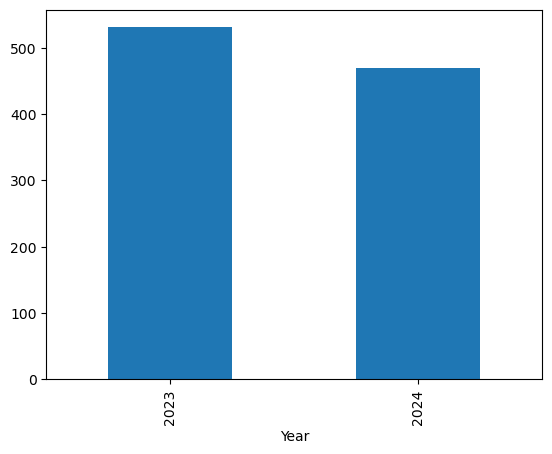

array([<Axes: ylabel='IP_Type'>], dtype=object)

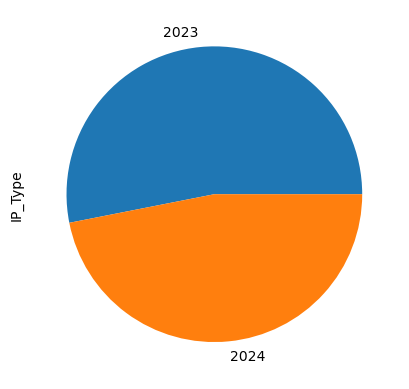

In [26]:
# plt.bar(x=data["Year"],height=data["IP_Type"].count())
ip_counts= data.pivot_table(index="Year",values="IP_Type",aggfunc='count')
ip_counts.plot(kind="bar",legend=False)
plt.show()
ip_counts.plot(kind="pie",legend=False,subplots=True)





In [27]:
# Check How many and Ip types in years
y=data.groupby(by=['Year','IP_Type']).size().sort_values()
y_2023=y.loc[2023]
y_2023 # In 2023 Patent is the Highest IP Filing in india 

IP_Type
Patent                     83
Trade secret               84
Trademark                  84
Copyright                  89
Geographical indication    93
Industrial design          98
dtype: int64

Text(0.5, 1.0, '2023')

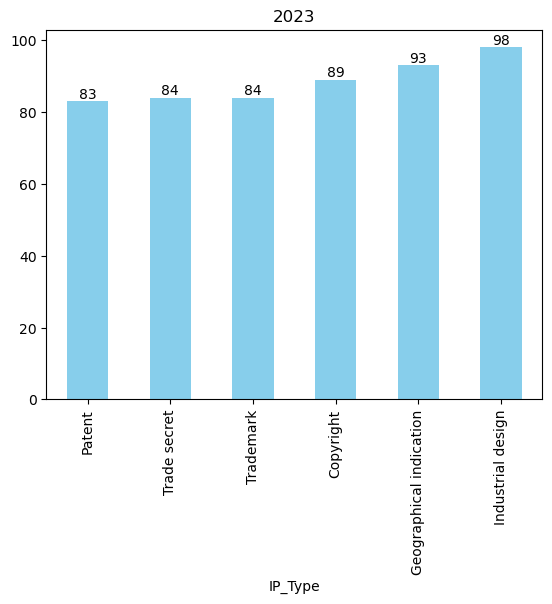

In [30]:
ax=y_2023.plot(kind="bar",color='skyblue')#autopct='%1.1f%%')
ax.bar_label(ax.containers[0])
plt.title("2023")

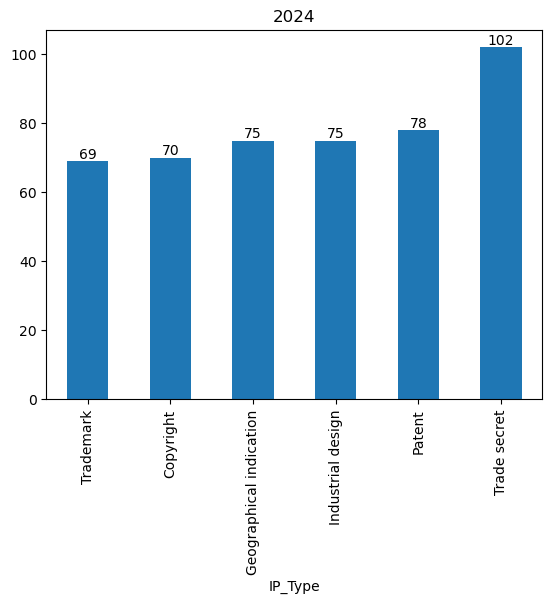

In [31]:
# IP_Type numbers in 2024 year
g_by=data.groupby(by=['Year','IP_Type']).size().sort_values()
y_2024=g_by.loc[2024]
ax=y_2024.plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.title("2024")
plt.show()  # But in 2024 Trade secret have Highest IP Filing in India 

In [33]:
data.head()

,Year,Date_of_Filing,Date_of_Expiration,IP_Case_ID,IP_Type,IP_Application_Status,Processing_Time_Days,Approval_Rate_percentage,Rejection_Reasons,Number_of_Opposition_Cases_Received,Number_of_Infringement_Cases,IP_Filing_State,Pre_IP_Action_Revenue(INR),Post_IP_Action_Revenue(INR),Enforcement_Cost(INR),IP_Type.1
0,2024,2024-03-19,2026-05-15,IP-4500,Trade secret,Pending,499.0,92.25,NaN,2,1,Tamil nadu,223840.19,422333.10,62209.78,Trade secret
1,2023,2023-06-15,2026-09-24,IP-4772,Copyright,Rejected,363.0,43.91,NaN,2,1,Punjab,338300.05,378851.26,51887.05,Copyright
2,2024,2024-07-08,2031-11-16,IP-6055,Industrial design,Registered,514.0,82.68,NaN,2,1,Karnataka,141143.15,177737.48,38161.51,Industrial design
3,2023,2023-06-18,2031-10-18,IP-4243,Trade secret,Pending,249.0,86.82,Incomplete Docs,2,1,Madhya pradesh,192693.25,265472.82,44187.54,Trade secret
4,2024,2024-02-22,2026-07-23,IP-8851,Industrial design,Pending,312.0,74.14,NaN,2,1,Assam,166170.68,340283.49,96641.57,Industrial design


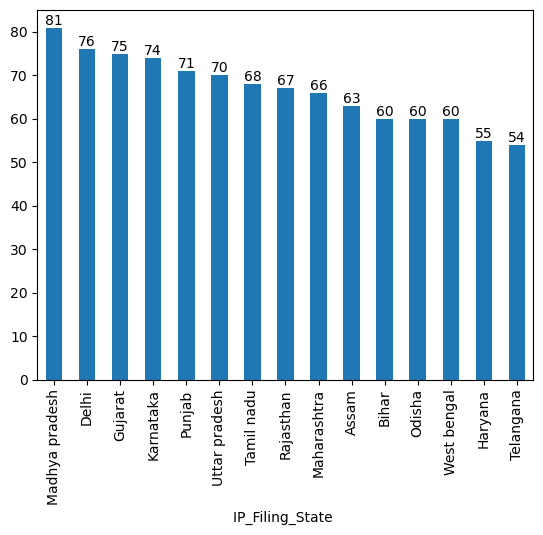

In [36]:
# Highest IP Filing state 
g_by=data.groupby(by=['IP_Filing_State ']).size().sort_values(ascending=False)
ax=g_by.plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

# Highest Ip filing state is Madhya Pradesh
# Lowest Filing state is telangana


In [37]:
# This is the data of Both year 
g_by=data.groupby(by=['IP_Filing_State ','IP_Type']).size().sort_values(ascending=False)
mp=g_by.loc['Madhya pradesh']
mp # Most of the IP Fill in Madhya Pradesh is Industrial Design
# Patent is the lowest IP Filing in Madhya Pradesh

IP_Type
Industrial design          17
Trade secret               15
Trademark                  13
Geographical indication    13
Copyright                  12
Patent                     11
dtype: int64

In [38]:
# Similar to find for Telangana:-
g_by=data.groupby(by=['IP_Filing_State ','IP_Type']).size().sort_values(ascending=False)
Tel=g_by.loc['Telangana']
Tel # As you see In Telangana Industrial design is lowest and trade Secret Ip Filing is of highest number 


IP_Type
Trade secret               16
Patent                     10
Geographical indication     9
Copyright                   7
Trademark                   6
Industrial design           6
dtype: int64

In [41]:
# In Legal Mitra Which Ip type Filing is most in india 
g_by=data.groupby(by=["IP_Type"]).size().sort_values()
g_by # In Both Year Trade secret is at the top place in Ip Filing 

IP_Type
Trademark                  153
Copyright                  159
Patent                     161
Geographical indication    168
Industrial design          173
Trade secret               186
dtype: int64

IP_Type
Patent                     83
Trade secret               84
Trademark                  84
Copyright                  89
Geographical indication    93
Industrial design          98
dtype: int64

IP_Type
Trademark                   69
Copyright                   70
Geographical indication     75
Industrial design           75
Patent                      78
Trade secret               102
dtype: int64


ValueError: need at least one array to concatenate

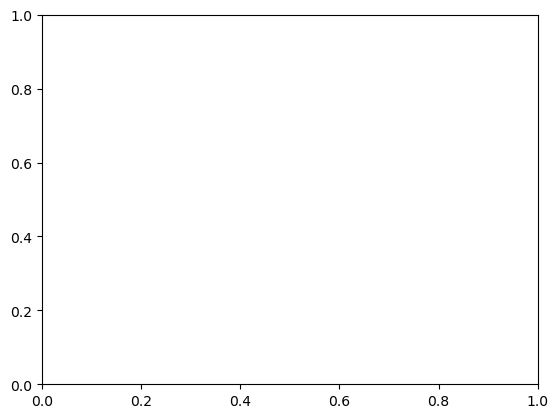

In [44]:
# Both Comparision Bar chart for this :- 
y=data.groupby(by=['Year','IP_Type']).size().sort_values()
y_2023=y.loc[2023]
print(y_2023)
print("")

g_by=data.groupby(by=['Year','IP_Type']).size().sort_values()
y_2024=g_by.loc[2024]
print(y_2024)

plt.stackplot(x=['y_2023','y_2024'],)

In [ ]:
y=data.groupby(by=['Year','IP_Type']).size().unstack(fill_value=0)
z=[y[col] for col in y.columns]
plt.stackplot(x,y,labels=y.columns)


In [6]:
data.head()

,Unnamed: 0,Year,Date_of_Filing,Date_of_Expiration,IP_Case_ID,IP_Type,IP_Application_Status,Processing_Time_Days,Approval_Rate_percentage,Rejection_Reasons,Number_of_Opposition_Cases_Received,Number_of_Infringement_Cases,IP_Filing_State,Pre_IP_Action_Revenue(INR),Post_IP_Action_Revenue(INR),Enforcement_Cost(INR)
0,0,2024,2024-03-19,2026-05-15,IP-4500,Trade secret,Pending,499.0,92.25,NaN,2,1,Tamil nadu,223840.19,422333.10,62209.78
1,1,2023,2023-06-15,2026-09-24,IP-4772,Copyright,Rejected,363.0,43.91,NaN,2,1,Punjab,338300.05,378851.26,51887.05
2,2,2024,2024-07-08,2031-11-16,IP-6055,Industrial design,Registered,514.0,82.68,NaN,2,1,Karnataka,141143.15,177737.48,38161.51
3,3,2023,2023-06-18,2031-10-18,IP-4243,Trade secret,Pending,249.0,86.82,Incomplete Docs,2,1,Madhya pradesh,192693.25,265472.82,44187.54
4,4,2024,2024-02-22,2026-07-23,IP-8851,Industrial design,Pending,312.0,74.14,NaN,2,1,Assam,166170.68,340283.49,96641.57
